In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from ex4_utils import *
import sympy as sp

In [2]:
N = 40
v = np.linspace(5 * math.pi, 0, N)
x = np.cos(v) * v
y = np.sin(v) * v

# Nearly Constant Velocity

In [76]:
def NCV():
    T, q = sp.symbols("T, q")
    F = sp.Matrix([[0,0,1,0],
                [0,0,0,1],
                [0,0,0,0],
                [0,0,0,0]])

    AS = sp.exp(F*T)
    LS = sp.Matrix([[0,0],
                [0,0],
                [1,0],
                [0,1]])
    Q_iS = sp.integrate((AS*LS)*q*(AS*LS).T, (T, 0, T))

    CS = sp.Matrix([[1, 0, 0, 0],
                [0, 1, 0, 0]])

    r = sp.symbols("r")
    R_iS = sp.Matrix([[r, 0],
                    [0, r]])
    
    print(Q_iS)

    return T, q, AS, LS, Q_iS, CS, r, R_iS

In [77]:
ags = NCV()

Matrix([[T**3*q/3, 0, T**2*q/2, 0], [0, T**3*q/3, 0, T**2*q/2], [T**2*q/2, 0, T*q, 0], [0, T**2*q/2, 0, T*q]])


In [4]:
def run_NCV_kalman(q_val, r_val):
    T, q, AS, LS, Q_iS, CS, r, R_iS = NCV()
    sx = np.zeros((x.size, 1), dtype=np.float32).flatten()
    sy = np.zeros((y.size, 1), dtype=np.float32).flatten()
    sx[0] = x[0]
    sy[0] = y[0]
    state = np.zeros((AS.shape[0], 1) ,dtype=np.float32).flatten()
    state[0] = x[0]
    state[1] = y[0]
    covariance = np.eye(AS.shape[0], dtype=np.float32)
    for j in range(1, x.size):
        T_val = 1  # time step
        A = np.array(AS.subs(T, T_val).evalf(), dtype=np.float32)
        Q_i = np.array(Q_iS.subs({T: T_val, q: q_val}).evalf(), dtype=np.float32)  # .evalf() evaluates the symbolic expression
        C = np.array(CS, dtype=np.float32)
        R_i = np.array(R_iS.subs(r, r_val).evalf(), dtype=np.float32)
        state , covariance , _ , _ = kalman_step(A, C, Q_i, R_i, np.reshape(np.array([x[j], y[j]]), (-1, 1)),np.reshape(state, (-1, 1)), covariance)
        sx[j] = state[0]
        sy[j] = state[1]
    return sx, sy, "NCV"

C:\Users\matej\AppData\Local\Temp\ipykernel_24320\363548956.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
C:\Users\matej\AppData\Local\Temp\ipykernel_24320\363548956.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[1]


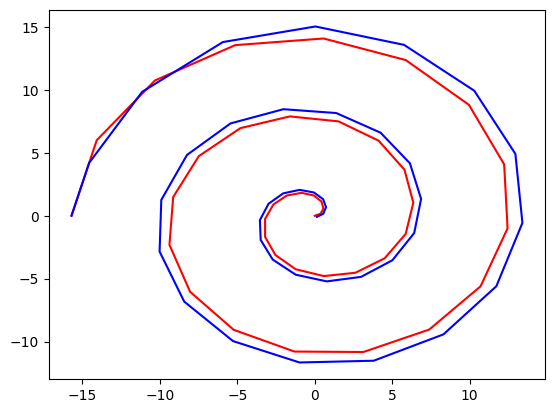

In [5]:
plt.plot(x, y, c="r")
sx, sy, _ = run_NCV_kalman(1, 1)
plt.plot(sx, sy, c="b")

# Random walk

In [78]:
def RW():
    T, q = sp.symbols("T, q")
    F = sp.Matrix([[0, 0],
                   [0, 0]])

    AS = sp.exp(F*T)

    LS = sp.Matrix([[1, 0],
                    [0, 1]])


    Q_iS = sp.integrate((AS*LS)*q*(AS*LS).T, (T, 0, T))

    CS = sp.Matrix([[1, 0],
                [0, 1]])

    r = sp.symbols("r")
    R_iS = sp.Matrix([[r, 0],
                    [0, r]])
    print(AS)
    print(Q_iS)
    return T, q, F, AS, LS, Q_iS, CS, r, R_iS

In [79]:
args = RW()

Matrix([[1, 0], [0, 1]])
Matrix([[T*q, 0], [0, T*q]])


In [7]:
def run_RW_kalman(q_val, r_val):
    T, q, F, AS, LS, Q_iS, CS, r, R_iS = RW()
    sx = np.zeros((x.size, 1), dtype=np.float32).flatten()
    sy = np.zeros((y.size, 1), dtype=np.float32).flatten()
    sx[0] = x[0]
    sy[0] = y[0]
    state = np.zeros((AS.shape[0], 1) ,dtype=np.float32).flatten()
    state[0] = x[0]
    state[1] = y[0]
    covariance = np.eye(AS.shape[0], dtype=np.float32)
    for j in range(1, x.size):
        T_val = 1  # time step
        A = np.array(AS.subs(T, T_val).evalf(), dtype=np.float32)
        Q_i = np.array(Q_iS.subs({T: T_val, q: q_val}).evalf(), dtype=np.float32)  # .evalf() evaluates the symbolic expression
        C = np.array(CS, dtype=np.float32)
        R_i = np.array(R_iS.subs(r, r_val).evalf(), dtype=np.float32)
        state , covariance , _ , _ = kalman_step(A, C, Q_i, R_i, np.reshape(np.array([x[j], y[j]]), (-1, 1)),np.reshape(state, (-1, 1)), covariance)
        sx[j] = state[0]
        sy[j] = state[1]

    return sx, sy, "RW"

C:\Users\matej\AppData\Local\Temp\ipykernel_24320\1616154277.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
C:\Users\matej\AppData\Local\Temp\ipykernel_24320\1616154277.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[1]


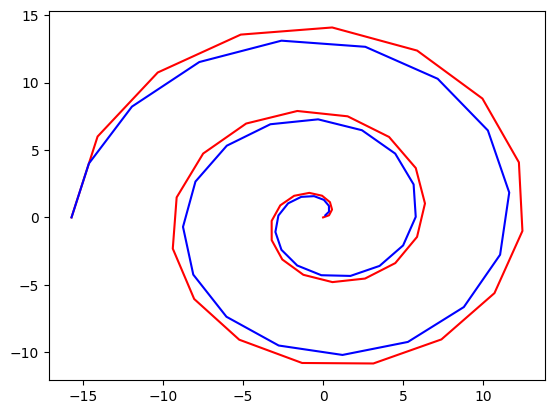

In [8]:
plt.plot(x, y, c="r")
sx, sy, _ = run_RW_kalman(1, 1)
plt.plot(sx, sy, c="b")

# Nearly constant acceleration

In [ ]:
def NCA():
    T, q = sp.symbols("T, q")
    F = sp.Matrix([
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]
    ])

    AS = sp.exp(F*T)

    LS = sp.Matrix([
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [1, 0],
        [0, 1]
    ])

    Q_iS = sp.integrate((AS*LS)*q*(AS*LS).T, (T, 0, T))

    CS = sp.Matrix([
        [1, 0, 0, 0, 0, 0],  # observe x
        [0, 1, 0, 0, 0, 0]   # observe y
    ])

    r = sp.symbols("r")
    R_iS = sp.Matrix([[r, 0],
                    [0, r]])
    print(AS)
    print(Q_iS)
    
    return T, q, AS, LS, Q_iS, CS, r, R_iS

In [10]:
def run_NCA_kalman(q_val, r_val):
    T, q, AS, LS, Q_iS, CS, r, R_iS = NCA()
    sx = np.zeros((x.size, 1), dtype=np.float32).flatten()
    sy = np.zeros((y.size, 1), dtype=np.float32).flatten()
    sx[0] = x[0]
    sy[0] = y[0]
    state = np.zeros((AS.shape[0], 1) ,dtype=np.float32).flatten()
    state[0] = x[0]
    state[1] = y[0]
    covariance = np.eye(AS.shape[0], dtype=np.float32)
    for j in range(1, x.size):
        T_val = 1  # time step
        A = np.array(AS.subs(T, T_val).evalf(), dtype=np.float32)
        Q_i = np.array(Q_iS.subs({T: T_val, q: q_val}).evalf(), dtype=np.float32)  # .evalf() evaluates the symbolic expression
        C = np.array(CS, dtype=np.float32)
        R_i = np.array(R_iS.subs(r, r_val).evalf(), dtype=np.float32)
        state , covariance , _ , _ = kalman_step(A, C, Q_i, R_i, np.reshape(np.array([x[j], y[j]]), (-1, 1)),np.reshape(state, (-1, 1)), covariance)
        sx[j] = state[0]
        sy[j] = state[1]
    return sx, sy, "NCA"

C:\Users\matej\AppData\Local\Temp\ipykernel_24320\2723811078.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
C:\Users\matej\AppData\Local\Temp\ipykernel_24320\2723811078.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[1]


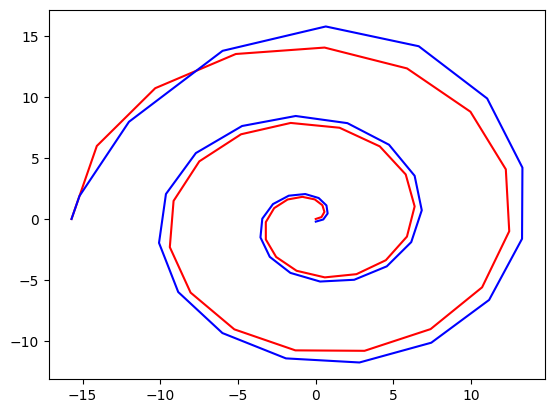

In [11]:
plt.plot(x, y, c="r")
sx, sy, _ = run_NCA_kalman(1, 5)
plt.plot(sx, sy, c="b")

# Plotting the big plot

C:\Users\matej\AppData\Local\Temp\ipykernel_24320\1616154277.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
C:\Users\matej\AppData\Local\Temp\ipykernel_24320\1616154277.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[1]


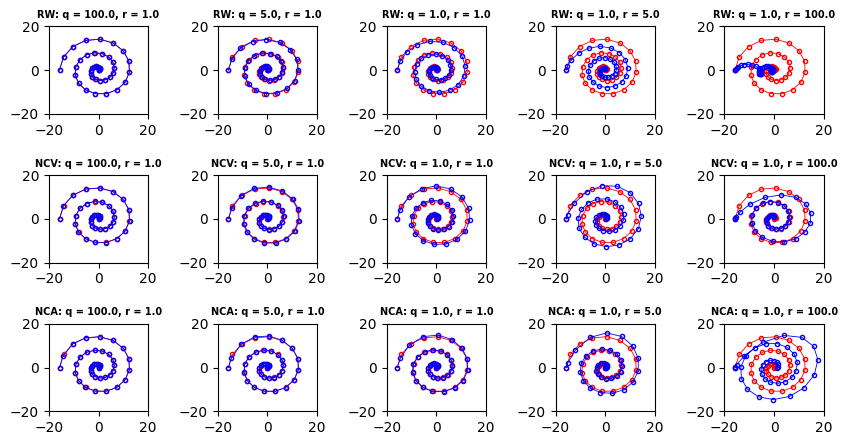

In [62]:
from itertools import product
N = 40
v = np.linspace(5 * math.pi, 0, N)
x = np.cos(v) * v
y = np.sin(v) * v
fig, axes = plt.subplots(3,5, gridspec_kw={'wspace': 0.7, 'hspace': 0.7}, figsize=(10, 5))
funcs = [run_RW_kalman, run_NCV_kalman, run_NCA_kalman]
arg_pairs = [(100.0, 1.0), (5.0, 1.0),(1.0, 1.0), (1.0, 5.0), (1.0, 100.0)]

for i, f in enumerate(funcs):
    for j, arg_pair in enumerate(arg_pairs):
        xs, ys, t = f(*arg_pair)
        axes[i][j].plot(x, y, c="r", marker="o", markersize=3, linewidth=0.6, markerfacecolor="none")
        axes[i][j].plot(xs, ys, c="b", marker="o", markersize=3, linewidth=0.6, markerfacecolor="none")
        axes[i][j].set_title(F"{t}: q = {arg_pair[0]}, r = {arg_pair[1]}", fontsize=7, fontweight='bold')
        axes[i][j].set_xlim(-20, 20)
        axes[i][j].set_ylim(-20, 20)
plt.savefig("spiral.pdf", bbox_inches="tight")


C:\Users\matej\AppData\Local\Temp\ipykernel_24320\1616154277.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
C:\Users\matej\AppData\Local\Temp\ipykernel_24320\1616154277.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[1]


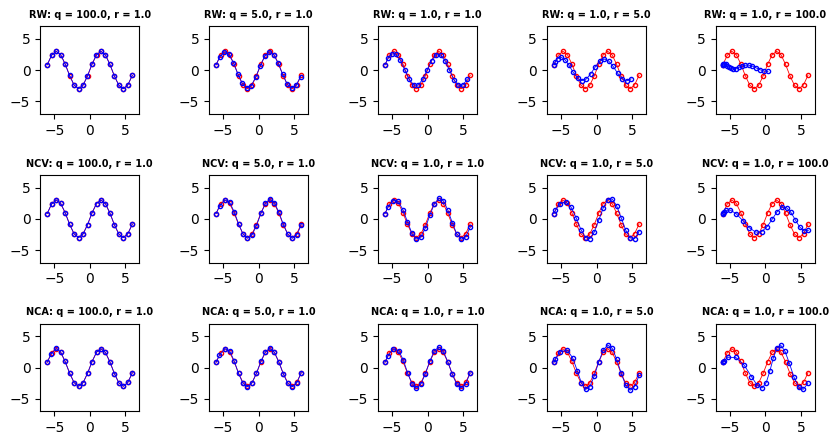

In [63]:
from itertools import product
N = 20
x = np.linspace(-6, 6, N)
y = 3*np.sin(x)
fig, axes = plt.subplots(3,5, gridspec_kw={'wspace': 0.7, 'hspace': 0.7}, figsize=(10, 5))
funcs = [run_RW_kalman, run_NCV_kalman, run_NCA_kalman]
arg_pairs = [(100.0, 1.0), (5.0, 1.0),(1.0, 1.0), (1.0, 5.0), (1.0, 100.0)]

for i, f in enumerate(funcs):
    for j, arg_pair in enumerate(arg_pairs):
        xs, ys, t = f(*arg_pair)
        axes[i][j].plot(x, y, c="r", marker="o", markersize=3, linewidth=0.6, markerfacecolor="none")
        axes[i][j].plot(xs, ys, c="b", marker="o", markersize=3, linewidth=0.6, markerfacecolor="none")
        axes[i][j].set_title(F"{t}: q = {arg_pair[0]}, r = {arg_pair[1]}", fontsize=7, fontweight='bold')
        axes[i][j].set_xlim(-7, 7)
        axes[i][j].set_ylim(-7, 7)

plt.savefig("sine.pdf", bbox_inches="tight")

C:\Users\matej\AppData\Local\Temp\ipykernel_24320\1616154277.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
C:\Users\matej\AppData\Local\Temp\ipykernel_24320\1616154277.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[1]


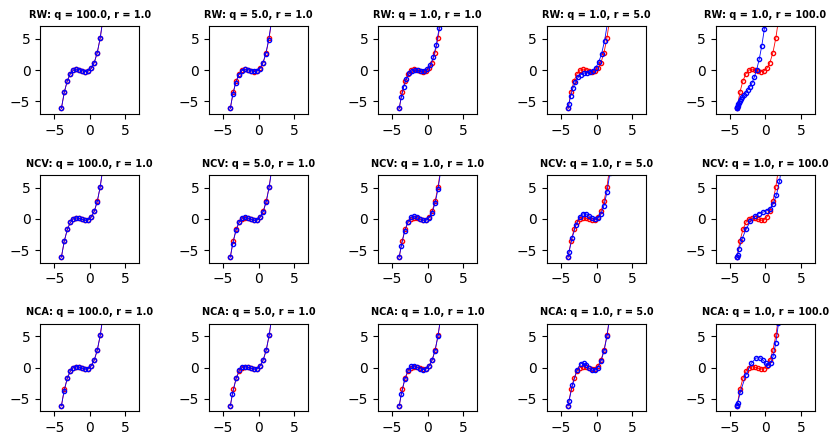

In [64]:
from itertools import product
x = np.linspace(-4, 4, 20)

y = 1/3*x**3 + 1.2*x**2 + x
fig, axes = plt.subplots(3,5, gridspec_kw={'wspace': 0.7, 'hspace': 0.7}, figsize=(10, 5))
funcs = [run_RW_kalman, run_NCV_kalman, run_NCA_kalman]
arg_pairs = [(100.0, 1.0), (5.0, 1.0),(1.0, 1.0), (1.0, 5.0), (1.0, 100.0)]

for i, f in enumerate(funcs):
    for j, arg_pair in enumerate(arg_pairs):
        xs, ys, t = f(*arg_pair)
        axes[i][j].plot(x, y, c="r", marker="o", markersize=3, linewidth=0.6, markerfacecolor="none")
        axes[i][j].plot(xs, ys, c="b", marker="o", markersize=3, linewidth=0.6, markerfacecolor="none")
        axes[i][j].set_title(F"{t}: q = {arg_pair[0]}, r = {arg_pair[1]}", fontsize=7, fontweight='bold')
        axes[i][j].set_xlim(-7, 7)
        axes[i][j].set_ylim(-7, 7)

plt.savefig("polynomial.pdf", bbox_inches="tight")

In [68]:

def rectangular_trajectory(x0, y0, width, height, steps_per_edge=20, clockwise=False):

    x = []
    y = []
    
    # Define corners
    corners = [
        (x0, y0),                      # top-left
        (x0 + width, y0),              # top-right
        (x0 + width, y0 + height),     # bottom-right
        (x0, y0 + height)              # bottom-left
    ]
    
    if not clockwise:
        corners = corners[::-1]
    
    for i in range(4):
        x_start, y_start = corners[i]
        x_end, y_end = corners[(i + 1) % 4]
        xs = np.linspace(x_start, x_end, steps_per_edge)
        ys = np.linspace(y_start, y_end, steps_per_edge)
        x.extend(xs)
        y.extend(ys)
    
    return np.array(x), np.array(y)

# Example usage


C:\Users\matej\AppData\Local\Temp\ipykernel_24320\1616154277.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
C:\Users\matej\AppData\Local\Temp\ipykernel_24320\1616154277.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[1]


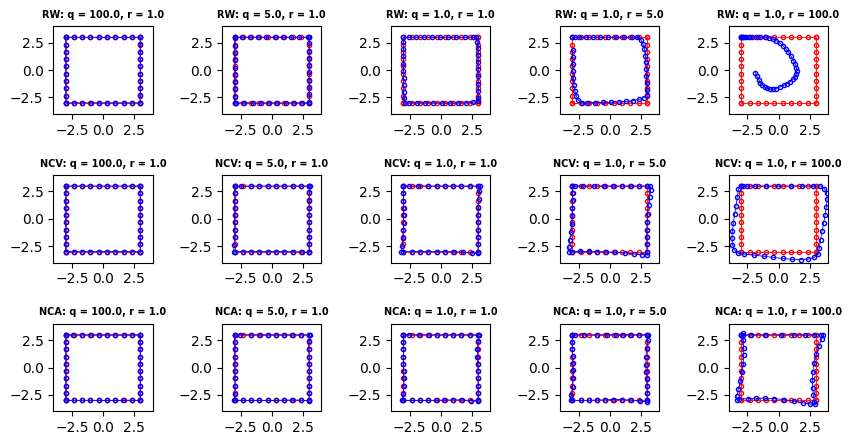

In [71]:
x, y = rectangular_trajectory(-3, -3, 6, 6, steps_per_edge=10)
fig, axes = plt.subplots(3,5, gridspec_kw={'wspace': 0.7, 'hspace': 0.7}, figsize=(10, 5))
funcs = [run_RW_kalman, run_NCV_kalman, run_NCA_kalman]
arg_pairs = [(100.0, 1.0), (5.0, 1.0),(1.0, 1.0), (1.0, 5.0), (1.0, 100.0)]

for i, f in enumerate(funcs):
    for j, arg_pair in enumerate(arg_pairs):
        xs, ys, t = f(*arg_pair)
        axes[i][j].plot(x, y, c="r", marker="o", markersize=3, linewidth=0.6, markerfacecolor="none")
        axes[i][j].plot(xs, ys, c="b", marker="o", markersize=3, linewidth=0.6, markerfacecolor="none")
        axes[i][j].set_title(F"{t}: q = {arg_pair[0]}, r = {arg_pair[1]}", fontsize=7, fontweight='bold')
        axes[i][j].set_xlim(-4, 4)
        axes[i][j].set_ylim(-4, 4)

plt.savefig("square.pdf", bbox_inches="tight")